In [0]:
import pandas as pd
news = pd.read_csv('news.csv')
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...


# Data cleaning

In [0]:
# converting the column into a text file
news_list = news.text

news_text = (" ").join(news_list)

In [0]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_news_text_round1(news_text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    news_text = news_text.lower()
    news_text = re.sub('\[.*?\]', '', news_text)
    news_text = re.sub('[%s]' % re.escape(string.punctuation), '', news_text)
    news_text = re.sub('\w*\d\w*', '', news_text)
    return news_text

round1 = lambda x: clean_news_text_round1(x)

In [0]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(news.text.apply(round1))
data_clean

,text
0,canadian pharmacies are limiting how much medi...
1,the yukon government has identified two places...
2,the senate late wednesday passed an unparallel...
3,scientists around the world are racing to find...
4,trudeau says rules of quarantine act will ...
...,...
3561,south korea on wednesday declared a formal end...
3562,the spread of mers coronavirus infections in h...
3563,its a relic of a bygone era when wealthy nova ...
3564,camels have been implicated in a middle easter...


In [0]:
# Apply a second round of cleaning
def clean_news_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_news_text_round2(x)

In [0]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(news.text.apply(round2))
data_clean

,text
0,Canadian pharmacies are limiting how much medi...
1,The Yukon government has identified two places...
2,The Senate late Wednesday passed an unparallel...
3,Scientists around the world are racing to find...
4,Trudeau says rules of Quarantine Act will ...
...,...
3561,South Korea on Wednesday declared a formal end...
3562,The spread of MERS coronavirus infections in h...
3563,"It's a relic of a bygone era, when wealthy Nov..."
3564,Camels have been implicated in a Middle Easter...


# Organizing the data

## Corpus

In [0]:
# Let's take a look at our dataframe
news

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...
...,...,...,...,...,...,...,...
3561,4604,['The Associated Press'],South Korea declares end to MERS virus outbreak,2015-12-23 09:07:00,South Korea on Wednesday declared a formal end...,South Korea on Wednesday declared a formal end...,https://www.cbc.ca/news/health/korea-mers-outb...
3562,4605,['The Canadian Press'],MERS virus spread in hospitals should be focus...,2014-01-28 16:07:00,The spread of MERS coronavirus infections in h...,The spread of MERS coronavirus infections in h...,https://www.cbc.ca/news/health/mers-virus-spre...
3563,4606,['Cbc News'],Ellershausen Manor is for sale,2012-11-02 01:24:00,A clasic old home with a lot of history in now...,"It's a relic of a bygone era, when wealthy Nov...",https://www.cbc.ca/news/canada/nova-scotia/ell...
3564,4607,['Cbc News'],MERS virus from camels and humans called indis...,2014-04-29 16:57:00,Camels have been implicated in a Middle Easter...,Camels have been implicated in a Middle Easter...,https://www.cbc.ca/news/health/mers-virus-from...


In [0]:
# Let's pickle it for later use
news.to_pickle("corpus.pkl")

## Document-Term Matrix

In [0]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,00,000,0000,000sars,000what,002,004,006,0064,007,0075,008,009,00t2trnd7g,01,012,013,016,017,018,02,021,022,0222,023,029,03,032,035,036,037,038,04,040,042,043,045,048,049,05,...,zoolander,zoom,zoonosis,zoonotic,zoos,zorabots,zouave,zouping,zpilrdhasb,zqfnzbaya9,zucchini,zulekha,zulich,zulu,zurich,zvakada,zvulun,zwack,zweben,zwicker,zwiehoff,zzgwbgg9fd,ève,école,écoles,écrivant,édouard,éemi,émilie,émond,épidémiologie,éric,étoile,étudiants,êtes,être,île,łutsël,ʼenux,有我们在大家安心过年
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [0]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
import pickle

data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [0]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565
00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000,1,0,4,1,2,0,2,1,6,0,1,0,0,4,1,2,0,2,0,2,0,0,0,0,0,2,0,0,0,2,0,0,2,1,15,0,0,3,0,1,...,4,0,2,0,0,1,0,1,3,0,0,2,0,1,0,0,0,3,0,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000sars,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000what,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('drugs', 9),
  ('said', 7),
  ('shortages', 5),
  ('supply', 5),
  ('india', 4),
  ('duffin', 4),
  ('prescription', 3),
  ('people', 3),
  ('medications', 3),
  ('ingredients', 3),
  ('active', 3),
  ('supplies', 3),
  ('china', 3),
  ('canadian', 2),
  ('outbreak', 2),
  ('dr', 2),
  ('chains', 2),
  ('produce', 2),
  ('19', 2),
  ('80', 2),
  ('jacalyn', 2),
  ('north', 2),
  ('prescriptions', 2),
  ('cent', 2),
  ('pay', 2),
  ('sold', 2),
  ('ongoing', 2),
  ('tadrous', 2),
  ('given', 2),
  ('pharmacies', 2)],
 1: [('church', 7),
  ('19', 6),
  ('covid', 5),
  ('march', 5),
  ('whitehorse', 4),
  ('government', 4),
  ('release', 4),
  ('dental', 4),
  ('yukon', 4),
  ('people', 3),
  ('attended', 3),
  ('symptoms', 3),
  ('says', 3),
  ('news', 3),
  ('sunday', 3),
  ('clinic', 3),
  ('according', 3),
  ('person', 3),
  ('bethany', 3),
  ('places', 3),
  ('develop', 2),
  ('identified', 2),
  ('services', 2),
  ('morning', 2),
  ('risk', 2),
  ('elias', 2),
  ('tested', 2),

In [0]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [0]:
data_stop.head()

,00,000,0000,000sars,000what,002,004,006,0064,007,0075,008,009,00t2trnd7g,01,012,013,016,017,018,02,021,022,0222,023,029,03,032,035,036,037,038,04,040,042,043,045,048,049,05,...,zoolander,zoom,zoonosis,zoonotic,zoos,zorabots,zouave,zouping,zpilrdhasb,zqfnzbaya9,zucchini,zulekha,zulich,zulu,zurich,zvakada,zvulun,zwack,zweben,zwicker,zwiehoff,zzgwbgg9fd,ève,école,écoles,écrivant,édouard,éemi,émilie,émond,épidémiologie,éric,étoile,étudiants,êtes,être,île,łutsël,ʼenux,有我们在大家安心过年
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


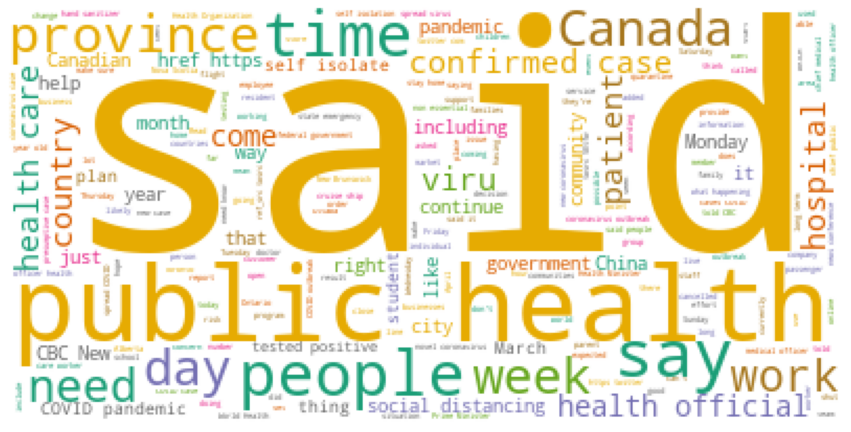

In [0]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

my_list = data_clean.text


#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = wc.generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()

# Sentiment Analysis